Found files: ['.\\2010-11.csv', '.\\2011-12.csv', '.\\2012-13.csv', '.\\2013-14.csv', '.\\2014-15.csv', '.\\2015-16.csv', '.\\2016-17.csv', '.\\2017-18.csv', '.\\2018-19.csv', '.\\2019-20.csv', '.\\2020-21.csv', '.\\2021-22.csv', '.\\2022-23.csv', '.\\2023-24.csv']
Loading: .\2010-11.csv
Successfully loaded .\2010-11.csv, shape: (380, 73)
Loading: .\2011-12.csv
Successfully loaded .\2011-12.csv, shape: (380, 73)
Loading: .\2012-13.csv
Successfully loaded .\2012-13.csv, shape: (380, 76)
Loading: .\2013-14.csv
Successfully loaded .\2013-14.csv, shape: (380, 70)
Loading: .\2014-15.csv
Successfully loaded .\2014-15.csv, shape: (380, 70)
Loading: .\2015-16.csv
Successfully loaded .\2015-16.csv, shape: (380, 67)
Loading: .\2016-17.csv
Successfully loaded .\2016-17.csv, shape: (380, 67)
Loading: .\2017-18.csv
Successfully loaded .\2017-18.csv, shape: (380, 67)
Loading: .\2018-19.csv
Successfully loaded .\2018-19.csv, shape: (380, 64)
Loading: .\2019-20.csv
Successfully loaded .\2019-20.csv, s

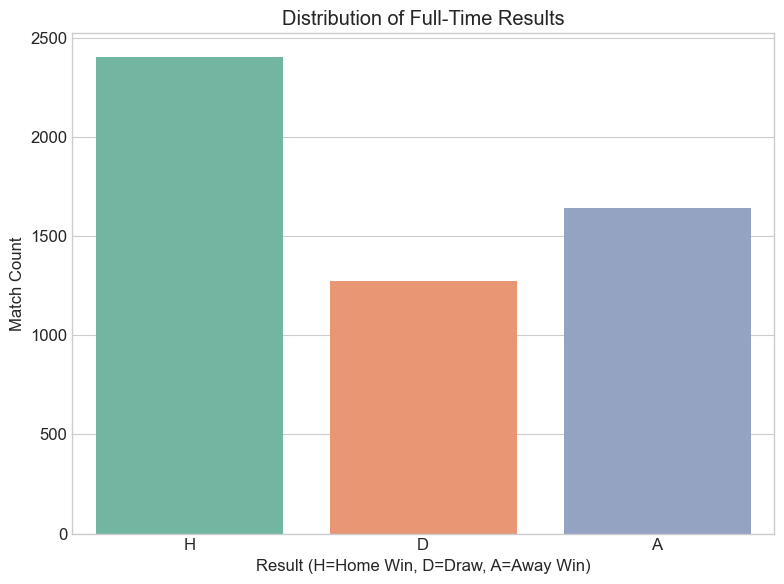

Result proportions (%):
FTR
H    45.17
A    30.85
D    23.98
Name: proportion, dtype: float64


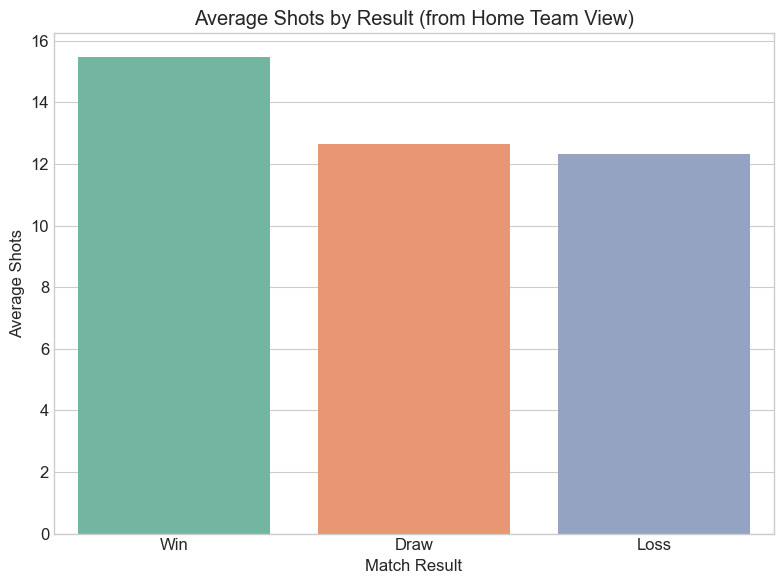


--- EDA: Goals per Season ---
 Season  TotalGoals  AvgGoals  FirstHalfGoals  SecondHalfGoals
2010-11        1063      2.80             476              587
2011-12        1066      2.81             464              602
2012-13        1063      2.80             464              599
2013-14        1052      2.77             463              589
2014-15         975      2.57             462              513
2015-16        1026      2.70             457              569
2016-17        1064      2.80             462              602
2017-18        1018      2.68             427              591
2018-19        1072      2.82             476              596
2019-20        1034      2.72             475              559
2020-21        1024      2.69             483              541
2021-22        1071      2.82             483              588
2022-23        1084      2.85             502              582
2023-24        1246      3.28             517              729


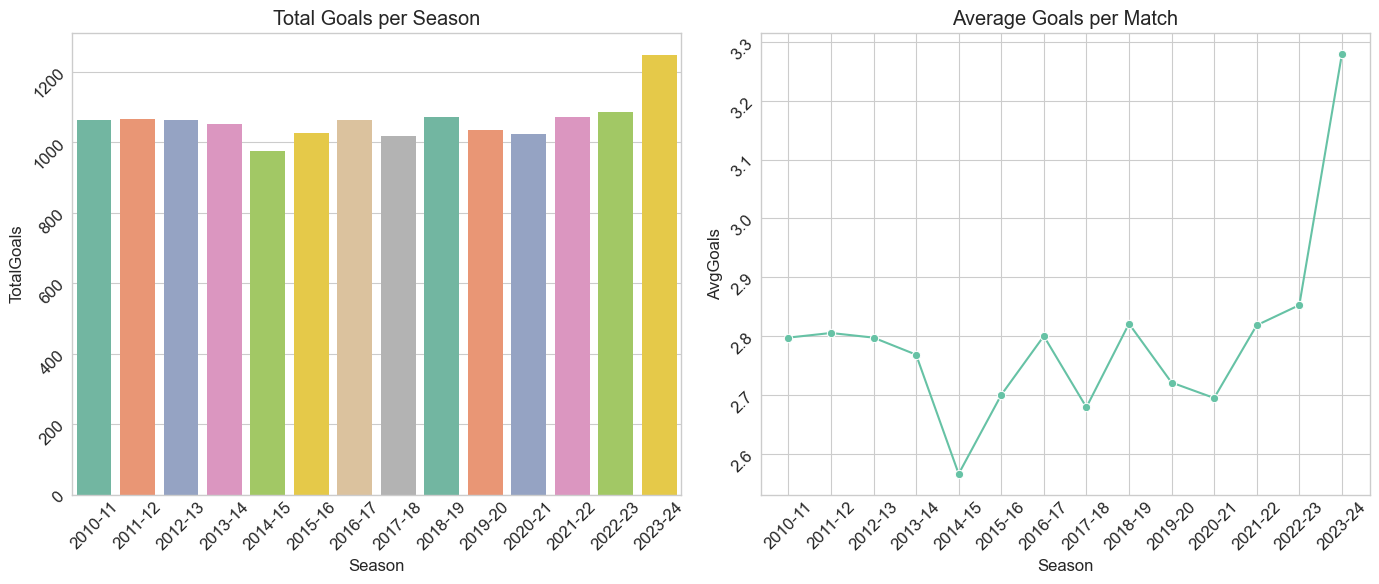


--- EDA: Results per Season ---
 Season  HomeWinRate  DrawRate  AwayWinRate
2010-11        47.11     29.21        23.68
2011-12        45.00     24.47        30.53
2012-13        43.68     28.42        27.89
2013-14        47.11     20.53        32.37
2014-15        45.26     24.47        30.26
2015-16        41.32     28.16        30.53
2016-17        49.21     22.11        28.68
2017-18        45.53     26.05        28.42
2018-19        47.63     18.68        33.68
2019-20        45.26     24.21        30.53
2020-21        37.89     21.84        40.26
2021-22        42.89     23.16        33.95
2022-23        48.42     22.89        28.68
2023-24        46.05     21.58        32.37


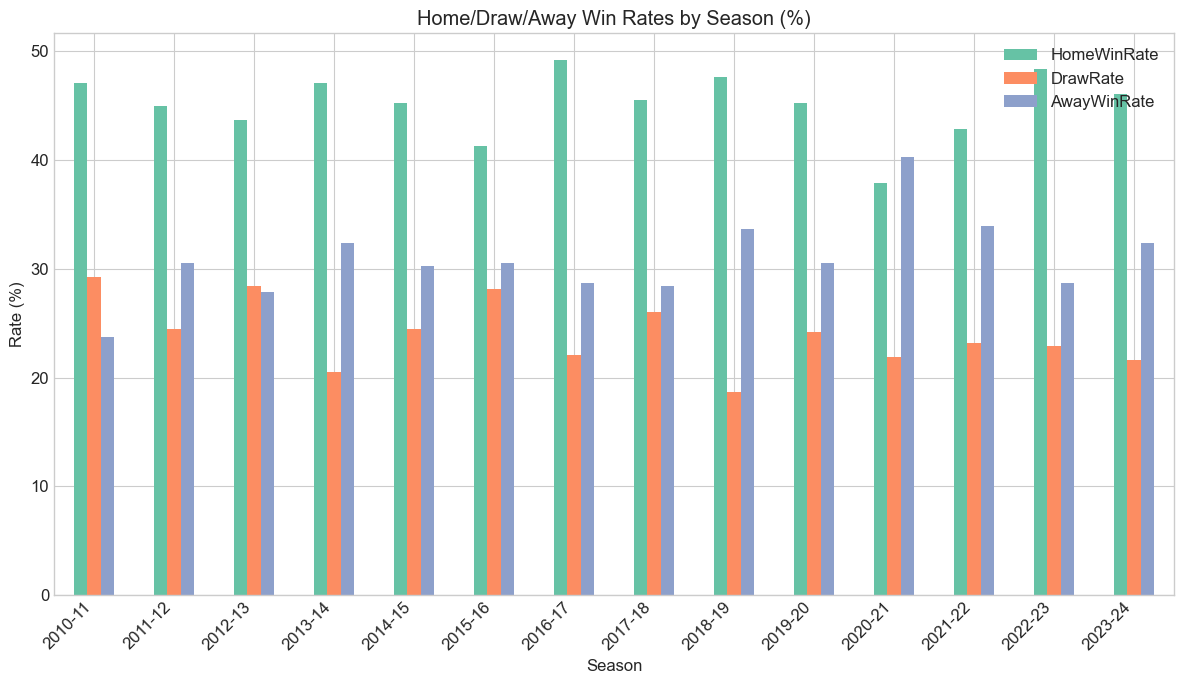


--- EDA: Shooting per Season ---
 Season  AvgShots  ShotAccuracy%  GoalConversion%
2010-11     24.87          54.75            20.55
2011-12     25.97          56.51            19.12
2012-13     25.14          56.64            19.65
2013-14     26.88          33.20            31.02
2014-15     25.91          32.44            30.53
2015-16     25.68          33.14            31.73
2016-17     25.50          34.00            32.30
2017-18     24.45          34.34            31.91
2018-19     25.28          34.45            32.40
2019-20     24.72          34.58            31.83
2020-21     24.18          35.69            31.23
2021-22     25.58          34.48            31.95
2022-23     25.26          34.84            32.41
2023-24     27.58          35.78            33.23


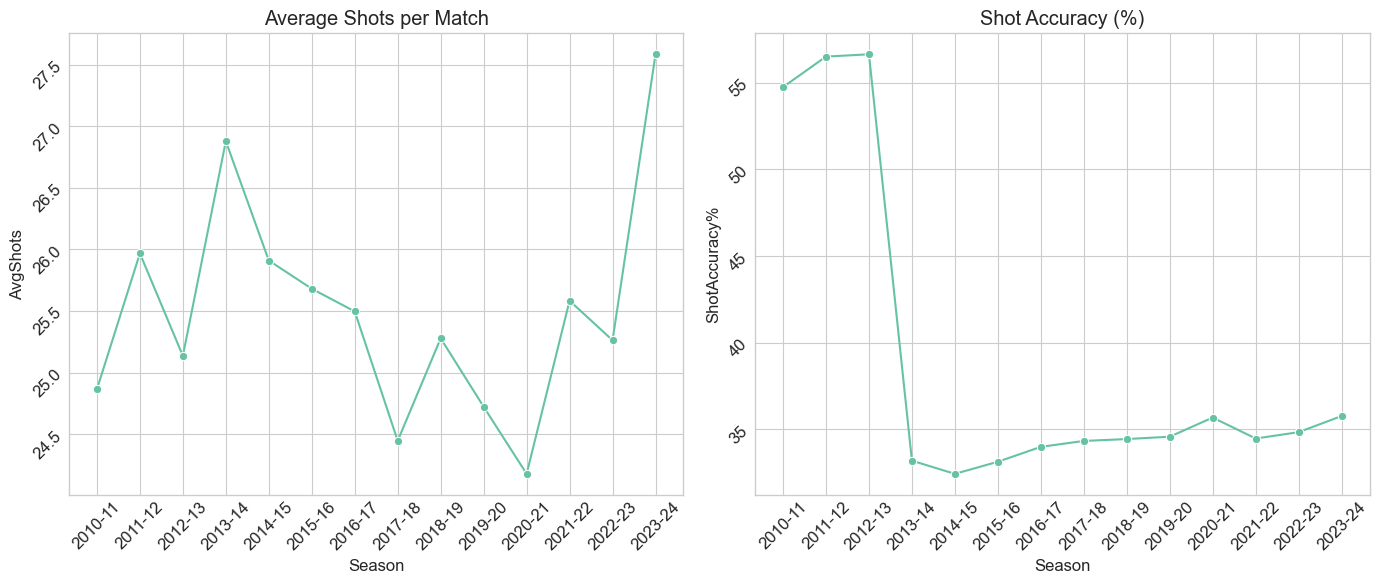


--- EDA: Discipline per Season ---
 Season  AvgYellow  AvgRed
2010-11       3.25    0.17
2011-12       3.10    0.17
2012-13       3.12    0.14
2013-14       3.19    0.14
2014-15       3.59    0.19
2015-16       3.10    0.16
2016-17       3.63    0.11
2017-18       3.04    0.10
2018-19       3.21    0.12
2019-20       3.35    0.12
2020-21       2.87    0.12
2021-22       3.40    0.11
2022-23       3.59    0.07
2023-24       4.17    0.15


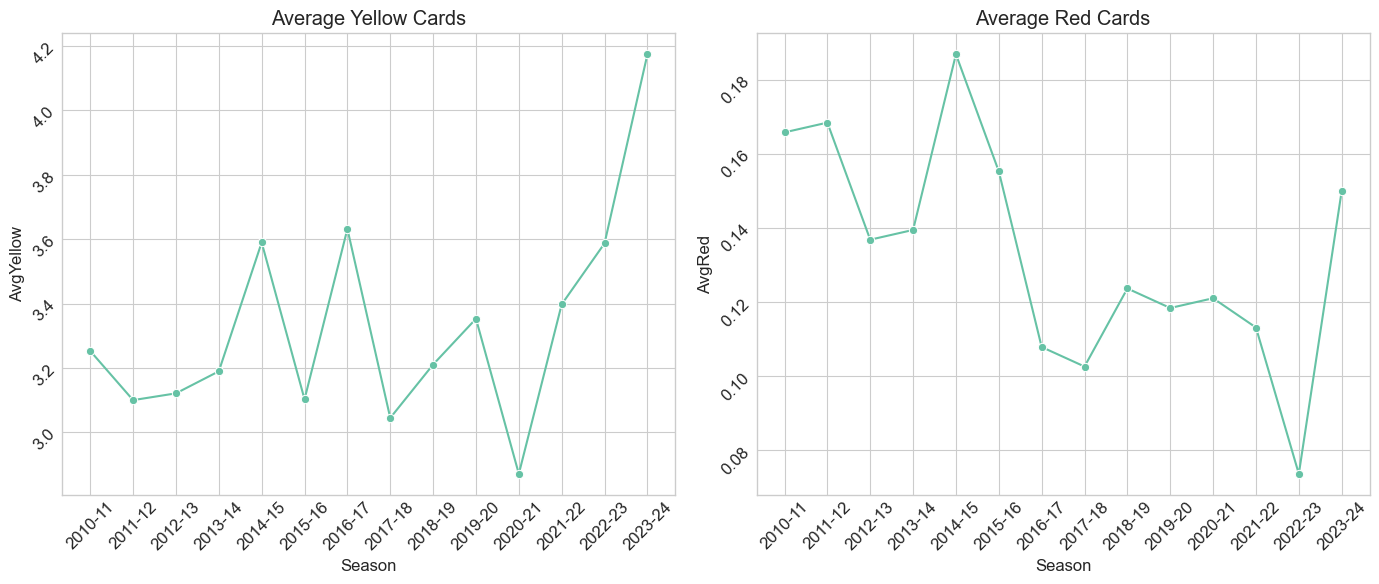


--- EDA: Correlation Heatmap ---


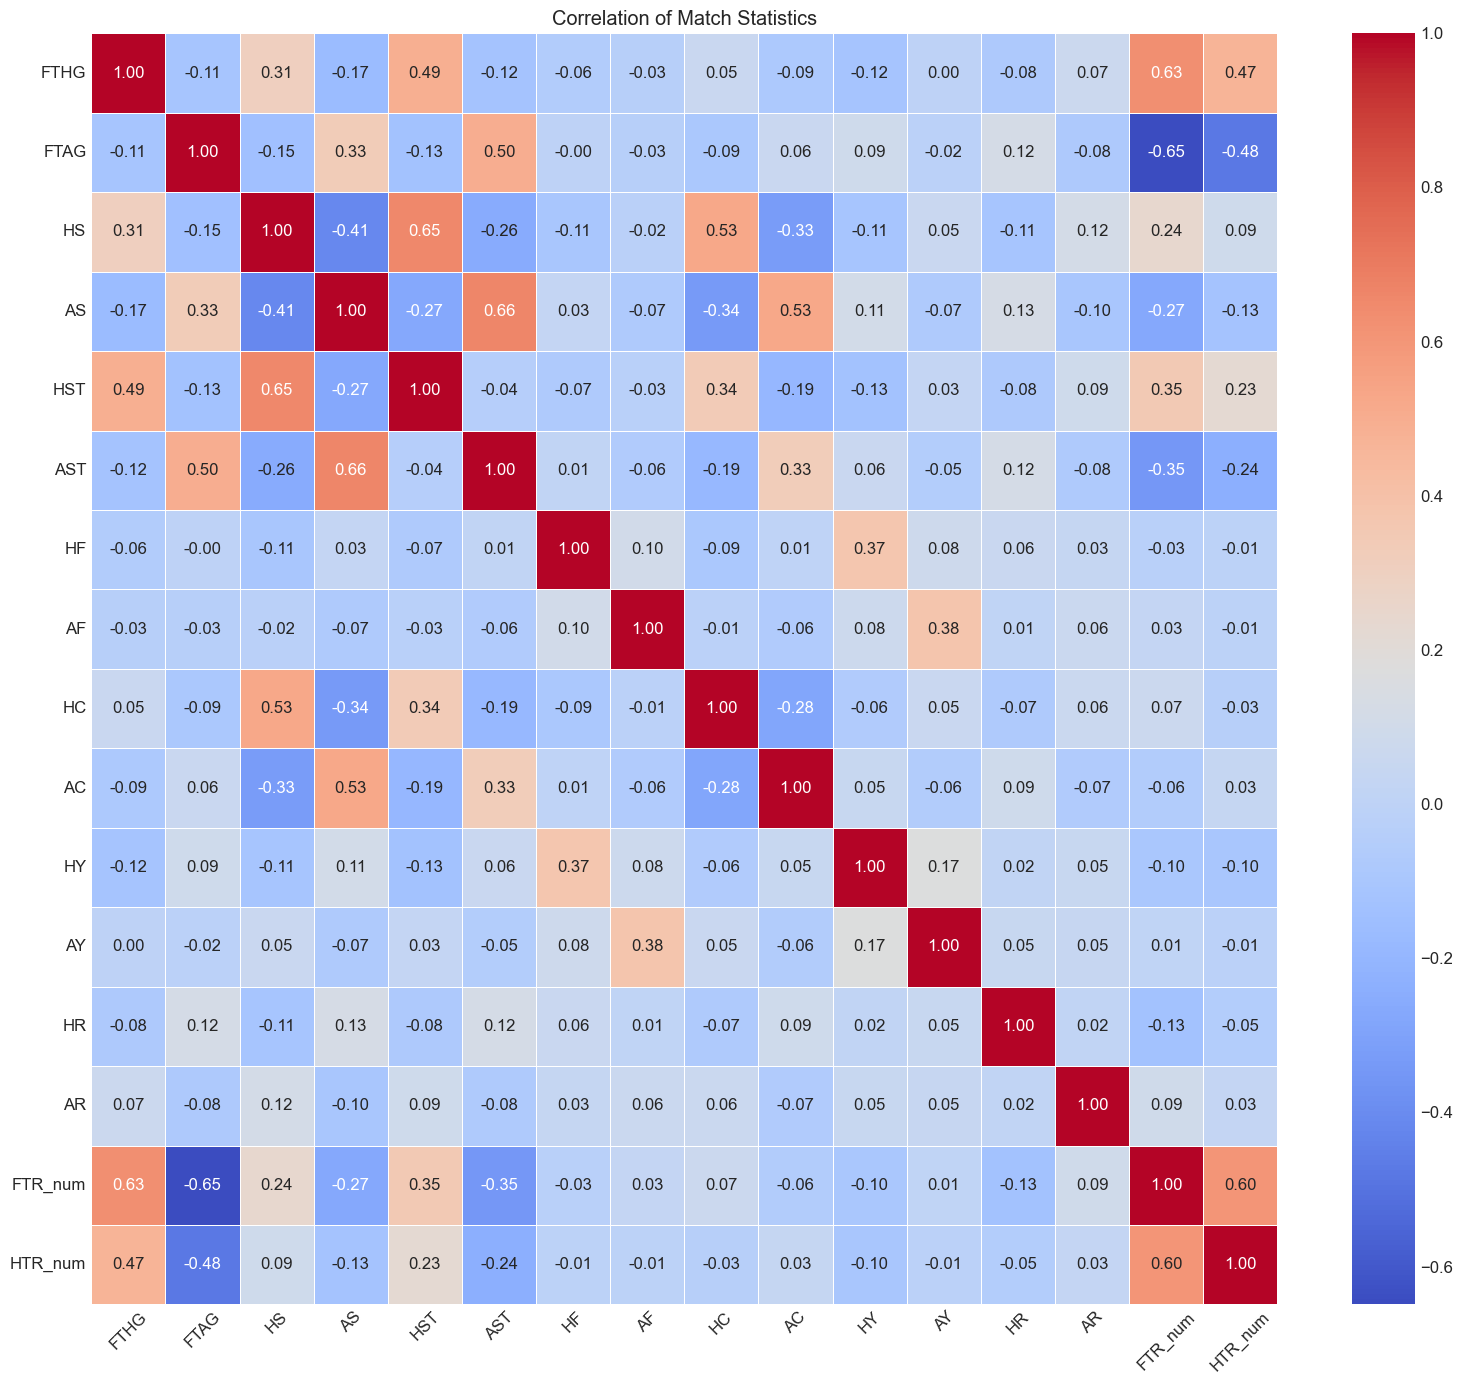

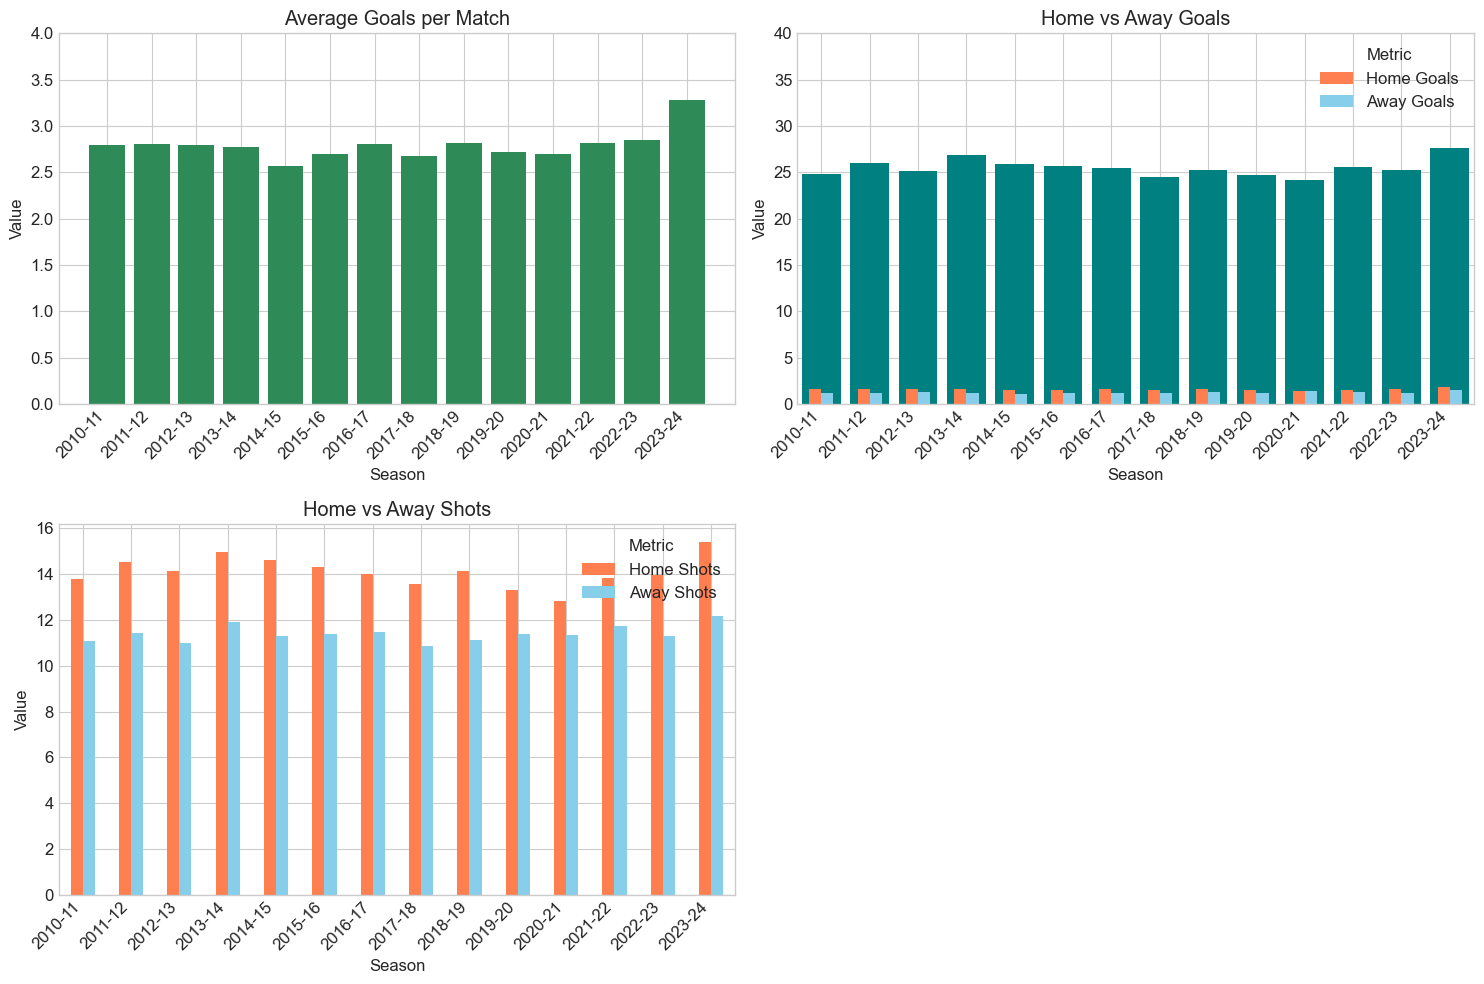

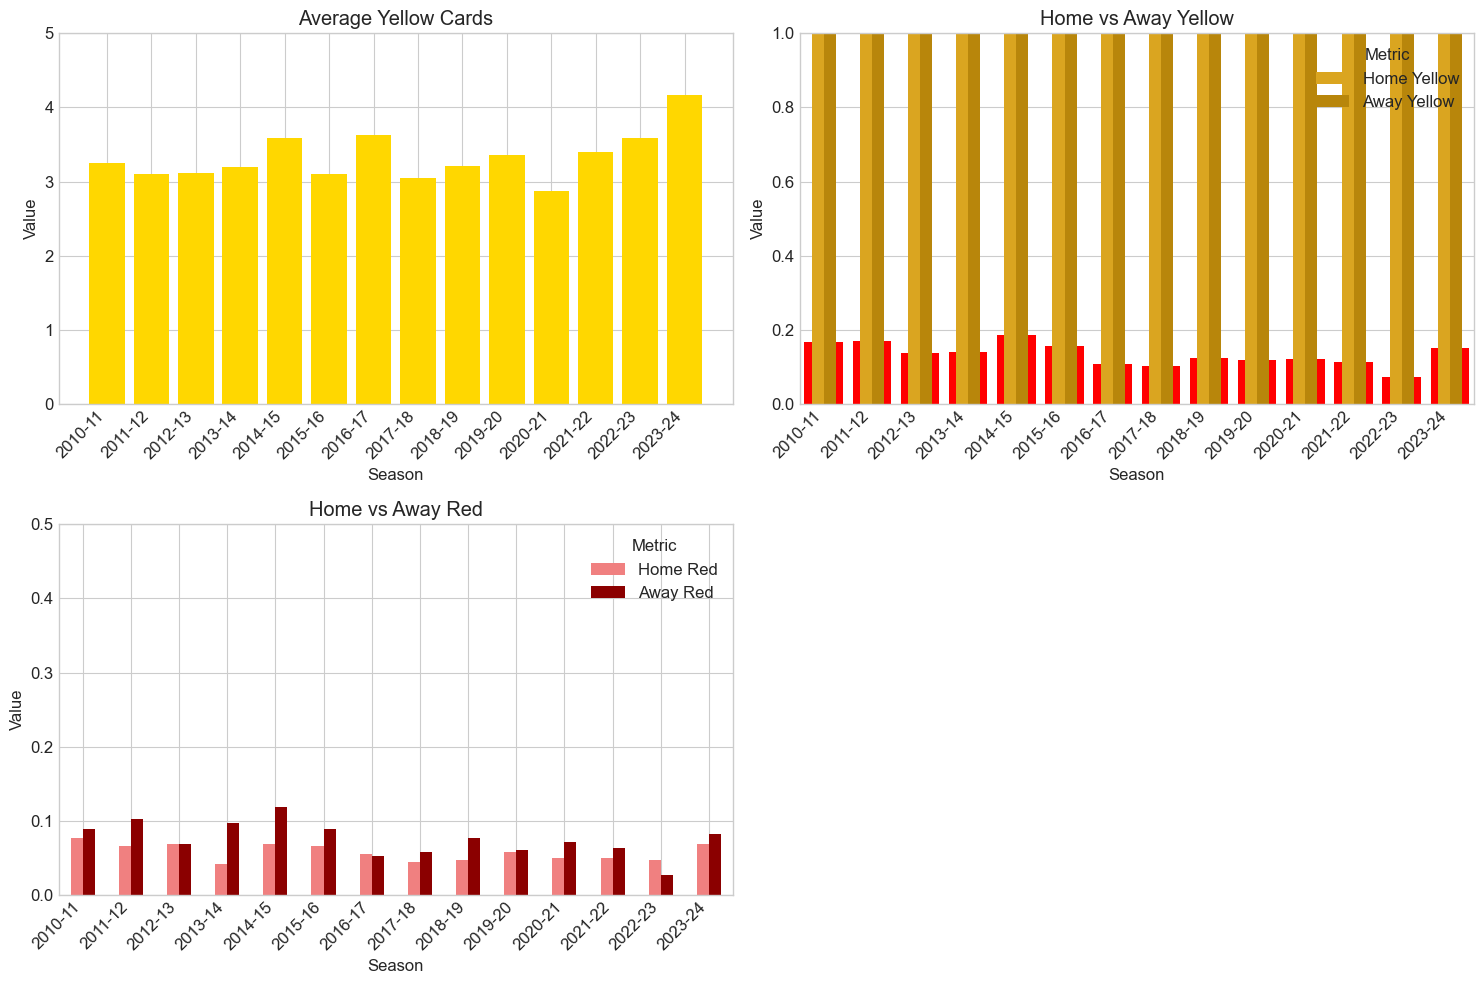


--- Feature Engineering ---
Engineered X shape: (5320, 18), Y shape: (5320,)

--- Scaling and PCA ---
10 components explain 95% variance.


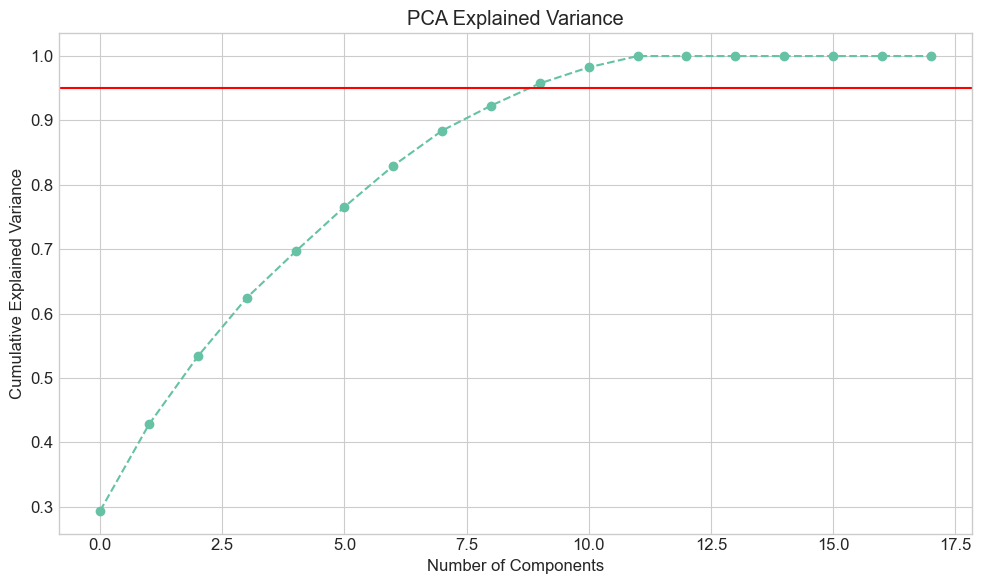

PCA output shape: (5320, 10)
Data ready for modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')  # Ignore minor warnings

# --- Chart Style Configuration ---
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')


plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


# --- 1. Data Loading ---

def load_epl_data_multiple(path, pattern="*.csv"):
    """
    Load and merge multiple EPL CSV files from a directory.

    Args:
        path (str): Directory containing the CSV files.
        pattern (str): Glob pattern to match CSV files.

    Returns:
        tuple: (combined_df, season_dfs) or (None, None) on error.
    """
    all_files = glob.glob(os.path.join(path, pattern))
    if not all_files:
        print(f"Error: No files matching '{pattern}' found in '{path}'.")
        return None, None

    all_data = []
    season_dfs = {}
    print(f"Found files: {all_files}")

    for file_path in all_files:
        print(f"Loading: {file_path}")
        try:
            df_temp = pd.read_csv(file_path, low_memory=False)

            # Extract season from filename
            basename = os.path.basename(file_path).replace('.csv', '')
            if '-' in basename and len(basename.split('-')[0]) == 4:
                season = basename
            elif '-' in basename and len(basename.split('-')[0]) == 2:
                prefix = "20" if int(basename.split('-')[0]) < 50 else "19"
                season = prefix + basename
            else:
                season = basename
                print(f"Warning: Could not standardize season from '{basename}'.")

            df_temp['Season'] = season

            # Parse Date column
            if 'Date' in df_temp.columns:
                df_temp['Date'] = pd.to_datetime(df_temp['Date'], dayfirst=True, errors='coerce')
            else:
                print(f"Warning: 'Date' column missing in {file_path}.")
                df_temp['Date'] = pd.NaT

            # Parse Time column
            if 'Time' in df_temp.columns:
                df_temp['Time'] = pd.to_datetime(df_temp['Time'], errors='coerce').dt.time
            else:
                df_temp['Time'] = None

            all_data.append(df_temp)
            season_dfs[season] = df_temp
            print(f"Successfully loaded {file_path}, shape: {df_temp.shape}")

        except UnicodeDecodeError:
            print(f"Retrying {file_path} with latin1 encoding...")
            try:
                df_temp = pd.read_csv(file_path, encoding='latin1', low_memory=False)
                # repeat season, date, time parsing as above...
                # (omitted here for brevity)
                df_temp['Season'] = season
                df_temp['Date'] = pd.to_datetime(df_temp.get('Date', pd.NaT), dayfirst=True, errors='coerce')
                df_temp['Time'] = pd.to_datetime(df_temp.get('Time', None), errors='coerce').dt.time
                all_data.append(df_temp)
                season_dfs[season] = df_temp
                print(f"Successfully loaded {file_path} with latin1, shape: {df_temp.shape}")
            except Exception as e:
                print(f"Error: Could not read {file_path}: {e}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    if not all_data:
        print("Error: No data files loaded successfully.")
        return None, None

    try:
        combined_df = pd.concat(all_data, ignore_index=True, sort=False)
        print(f"\nMerged {len(all_data)} files. Combined shape: {combined_df.shape}")
    except Exception as e:
        print(f"Error concatenating dataframes: {e}")
        return None, None

    return combined_df, season_dfs


def load_epl_data_excel(file_path, season_column=None):
    """
    Load EPL data from a single Excel file, splitting by season if possible.

    Args:
        file_path (str): Path to the Excel file.
        season_column (str): Name of the column containing season info.

    Returns:
        tuple: (df, season_dfs) or (None, None) on error.
    """
    print(f"Loading Excel file: {file_path}")
    try:
        try:
            df = pd.read_excel(file_path, engine='openpyxl')
            print("Loaded with openpyxl engine.")
        except:
            df = pd.read_excel(file_path, engine='xlrd')
            print("Loaded with xlrd engine.")

        if df.empty:
            print(f"Error: '{file_path}' is empty.")
            return None, None
        print(f"Excel shape: {df.shape}")

        # Determine or infer season column
        if season_column and season_column in df.columns:
            df[season_column] = df[season_column].astype(str)
        else:
            candidates = [c for c in df.columns if 'season' in c.lower()]
            if candidates:
                season_column = candidates[0]
                df[season_column] = df[season_column].astype(str)
                print(f"Found season column: '{season_column}'")
            else:
                # Infer from Date
                if 'Date' in df.columns:
                    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
                    def infer_season(d):
                        if pd.isna(d): return "Unknown"
                        if d.month >= 8:
                            return f"{d.year}-{str(d.year+1)[-2:]}"
                        else:
                            return f"{d.year-1}-{str(d.year)[-2:]}"
                    df['Season'] = df['Date'].apply(infer_season)
                    season_column = 'Season'
                    print("Inferred 'Season' from Date.")
                else:
                    name = Path(file_path).stem
                    df['Season'] = name
                    season_column = 'Season'
                    print(f"No Date column: using filename '{name}' as Season.")

        # Parse Date and Time
        df['Date'] = pd.to_datetime(df.get('Date'), dayfirst=True, errors='coerce')
        df['Time'] = pd.to_datetime(df.get('Time'), errors='coerce').dt.time if 'Time' in df.columns else None

        # Split by season
        season_dfs = {}
        seasons = df[season_column].unique()
        print(f"Identified seasons: {seasons}")
        for s in seasons:
            season_dfs[s] = df[df[season_column] == s].copy()
            print(f"Season {s}: {len(season_dfs[s])} matches")

        return df, season_dfs

    except Exception as e:
        print(f"Error loading Excel file {file_path}: {e}")
        return None, None


def load_epl_data(path, file_pattern="*.csv", excel_file=None, season_column=None):
    """
    Load EPL data from CSV files or a single Excel file.
    """
    if excel_file:
        return load_epl_data_excel(excel_file, season_column)
    else:
        return load_epl_data_multiple(path, file_pattern)


# --- 2. Data Cleaning & Preprocessing ---


def preprocess_data(df):
    """
    Clean and preprocess the combined DataFrame.

    Returns:
        pd.DataFrame or None on error.
    """
    print("\n--- Data Cleaning & Preprocessing ---")

    # Drop irrelevant columns (e.g. odds, referee)
    drop_cols = [c for c in df.columns if any(x in c for x in (
        'B365','BW','IW','PS','WH','VC','Max','Avg','P<','P>','AHh','AHCh','PC')) or c == 'Referee']
    df = df.drop(columns=[c for c in drop_cols if c in df.columns])
    print(f"Dropped {len(drop_cols)} potentially irrelevant columns.")

    # Ensure core stats exist
    core = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR',
            'HTHG','HTAG','HTR','HS','AS','HST','AST',
            'HF','AF','HC','AC','HY','AY','HR','AR','Season']
    missing = [c for c in core if c not in df.columns]
    if missing and any(x in missing for x in ('FTR','FTHG','FTAG')):
        print(f"Error: missing critical columns {missing}")
        return None

    # Keep core + Time
    keep = [c for c in core if c in df.columns] + (['Time'] if 'Time' in df.columns else [])
    df = df[keep]

    # Fill numeric NaNs with 0
    nums = ['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST',
            'HF','AF','HC','AC','HY','AY','HR','AR']
    for c in nums:
        if c in df.columns and df[c].isnull().any():
            n = df[c].isnull().sum()
            df[c] = df[c].fillna(0).astype(int)
            print(f"Filled {n} NaNs in {c} with 0.")

    # Encode results
    def enc(r): return {'H':1,'D':0,'A':-1}.get(r, np.nan)
    df['FTR_num'] = df['FTR'].apply(enc)
    df['HTR_num'] = df['HTR'].apply(enc)
    df.dropna(subset=['FTR_num','HTR_num'], inplace=True)
    df['FTR_num'] = df['FTR_num'].astype(int)
    df['HTR_num'] = df['HTR_num'].astype(int)
    print("Added 'FTR_num' and 'HTR_num' columns.")

    # Sort by date
    if pd.api.types.is_datetime64_any_dtype(df['Date']):
        df = df.sort_values('Date').reset_index(drop=True)
        print("Sorted data by Date.")

    print(f"Preprocessed shape: {df.shape}")
    return df


# --- 3. EDA Functions ---

def plot_distributions(df):
    """Plot distributions of full-time results and key features."""
    print("\n--- EDA: Distributions ---")
    if 'FTR' in df:
        plt.figure(figsize=(8,6))
        sns.countplot(x='FTR', data=df, order=['H','D','A'], palette='Set2')
        plt.title('Distribution of Full-Time Results')
        plt.xlabel('Result (H=Home Win, D=Draw, A=Away Win)')
        plt.ylabel('Match Count')
        plt.tight_layout()
        plt.savefig('dist_ftr.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("Result proportions (%):")
        print(df['FTR'].value_counts(normalize=True).mul(100).round(2))

    # Shots by result
    df['DrawShotsAvg'] = np.where(df['FTR']=='D', (df['HS']+df['AS'])/2, np.nan)
    avg_win = df[df['FTR']=='H']['HS'].mean()
    avg_awaywin = df[df['FTR']=='A']['HS'].mean()
    avg_draw = df['DrawShotsAvg'].mean()

    plt.figure(figsize=(8,6))
    sns.barplot(x=['Win','Draw','Loss'], y=[avg_win, avg_draw, avg_awaywin], palette='Set2')
    plt.title('Average Shots by Result (from Home Team View)')
    plt.xlabel('Match Result')
    plt.ylabel('Average Shots')
    plt.tight_layout()
    plt.savefig('shots_by_result.png', dpi=300, bbox_inches='tight')
    plt.show()


def analyze_goals_per_season(season_dfs):
    """Analyze and visualize goals by season."""
    print("\n--- EDA: Goals per Season ---")
    stats = []
    for season in sorted(season_dfs):
        df = season_dfs[season]
        total = df['FTHG'].sum() + df['FTAG'].sum()
        per_match = total/len(df) if df.size else 0
        first = df['HTHG'].sum()+df['HTAG'].sum()
        second = total-first
        stats.append({
            'Season': season,
            'TotalGoals': total,
            'AvgGoals': per_match,
            'FirstHalfGoals': first,
            'SecondHalfGoals': second
        })
    gdf = pd.DataFrame(stats)
    print(gdf.round(2).to_string(index=False))

    # Plot trends if multiple seasons
    if len(gdf)>1:
        fig, ax = plt.subplots(1,2, figsize=(14,6))
        sns.barplot(x='Season', y='TotalGoals', data=gdf, ax=ax[0], palette='Set2')
        ax[0].set_title('Total Goals per Season')
        ax[0].tick_params(rotation=45)

        sns.lineplot(x='Season', y='AvgGoals', data=gdf, marker='o', ax=ax[1], palette='Set2')
        ax[1].set_title('Average Goals per Match')
        ax[1].tick_params(rotation=45)

        plt.tight_layout()
        plt.savefig('goals_trends.png', dpi=300, bbox_inches='tight')
        plt.show()
    return gdf


def analyze_results_per_season(season_dfs):
    """Analyze and visualize match result rates per season."""
    print("\n--- EDA: Results per Season ---")
    stats = []
    for season in sorted(season_dfs):
        df = season_dfs[season]
        total = len(df)
        wins = (df['FTR']=='H').sum()
        draws = (df['FTR']=='D').sum()
        losses = (df['FTR']=='A').sum()
        stats.append({
            'Season': season,
            'HomeWinRate': wins/total*100,
            'DrawRate': draws/total*100,
            'AwayWinRate': losses/total*100
        })
    rdf = pd.DataFrame(stats)
    print(rdf.round(2).to_string(index=False))

    if len(rdf)>1:
        rdf.plot(x='Season', y=['HomeWinRate','DrawRate','AwayWinRate'],
                 kind='bar', figsize=(12,7))
        plt.title('Home/Draw/Away Win Rates by Season (%)')
        plt.ylabel('Rate (%)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('results_trends.png', dpi=300, bbox_inches='tight')
        plt.show()
    return rdf


def analyze_shooting_per_season(season_dfs):
    """Analyze and visualize shooting stats per season."""
    print("\n--- EDA: Shooting per Season ---")
    stats = []
    for season in sorted(season_dfs):
        df = season_dfs[season]
        total = len(df)
        hs = df['HS'].sum(); as_ = df['AS'].sum()
        hst = df['HST'].sum(); ast = df['AST'].sum()
        stats.append({
            'Season': season,
            'AvgShots': (hs+as_)/total if total else 0,
            'ShotAccuracy%': (hst+ast)/(hs+as_)*100 if (hs+as_) else 0,
            'GoalConversion%': (df['FTHG'].sum()+df['FTAG'].sum())/(hst+ast)*100 if (hst+ast) else 0
        })
    sdf = pd.DataFrame(stats)
    print(sdf.round(2).to_string(index=False))

    if len(sdf)>1:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.lineplot(x='Season', y='AvgShots', data=sdf, marker='o', ax=ax[0])
        ax[0].set_title('Average Shots per Match')
        ax[0].tick_params(rotation=45)
        sns.lineplot(x='Season', y='ShotAccuracy%', data=sdf, marker='o', ax=ax[1])
        ax[1].set_title('Shot Accuracy (%)')
        ax[1].tick_params(rotation=45)
        plt.tight_layout()
        plt.savefig('shooting_trends.png', dpi=300, bbox_inches='tight')
        plt.show()
    return sdf


def analyze_discipline_per_season(season_dfs):
    """Analyze and visualize cards per season."""
    print("\n--- EDA: Discipline per Season ---")
    stats = []
    for season in sorted(season_dfs):
        df = season_dfs[season]
        total = len(df)
        y = df['HY'].sum() + df['AY'].sum()
        r = df['HR'].sum() + df['AR'].sum()
        stats.append({
            'Season': season,
            'AvgYellow': y/total if total else 0,
            'AvgRed': r/total if total else 0
        })
    ddf = pd.DataFrame(stats)
    print(ddf.round(2).to_string(index=False))

    if len(ddf)>1:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.lineplot(x='Season', y='AvgYellow', data=ddf, marker='o', ax=ax[0])
        ax[0].set_title('Average Yellow Cards')
        ax[0].tick_params(rotation=45)
        sns.lineplot(x='Season', y='AvgRed', data=ddf, marker='o', ax=ax[1])
        ax[1].set_title('Average Red Cards')
        ax[1].tick_params(rotation=45)
        plt.tight_layout()
        plt.savefig('discipline_trends.png', dpi=300, bbox_inches='tight')
        plt.show()
    return ddf


def plot_correlation_heatmap(df):
    """Plot correlation heatmap of numeric features."""
    print("\n--- EDA: Correlation Heatmap ---")
    cols = [c for c in ['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','FTR_num','HTR_num'] if c in df]
    if len(cols)<2:
        print("Not enough numeric columns for correlation.")
        return
    corr = df[cols].corr()
    plt.figure(figsize=(16,14))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation of Match Statistics')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
def plot_multiple_metrics_by_season(season_dfs, metrics_config, show_bar_values=False):
    """
    Plot multiple metrics by season:
    - Top row: individual bar charts for each top metric.
    - Bottom row: grouped or stacked bar charts for metric groups.
    Args:
        season_dfs (dict): Dict of DataFrames keyed by season.
        metrics_config (dict): Configuration dict with 'top_metrics' and 'bottom_metrics'.
        show_bar_values (bool): Whether to annotate bars with values.
    Returns:
        matplotlib.figure.Figure: The generated figure.
    """
    import pandas as pd

    seasons = sorted(season_dfs.keys())
    n_top = len(metrics_config.get('top_metrics', []))
    n_bottom = len(metrics_config.get('bottom_metrics', []))
    n_rows = (1 if n_top else 0) + (1 if n_bottom else 0)
    n_cols = max(n_top, n_bottom)

    fig = plt.figure(figsize=(15, 5 * n_rows))

    # Top metrics
    for i, m in enumerate(metrics_config.get('top_metrics', [])):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        values = [m['compute_func'](season_dfs[s]) for s in seasons]
        bars = ax.bar(seasons, values, color=m.get('color'))
        ax.set_title(m['name'])
        ax.set_xlabel('Season')
        ax.set_ylabel('Value')
        ax.set_ylim(m.get('ylim', ax.get_ylim()))
        plt.xticks(rotation=45, ha='right')
        if show_bar_values:
            fmt = m.get('format', '{:.2f}')
            for b in bars:
                h = b.get_height()
                ax.text(b.get_x() + b.get_width()/2, h, fmt.format(h), ha='center', va='bottom')

    # Bottom metric groups
    for j, g in enumerate(metrics_config.get('bottom_metrics', [])):
        ax = plt.subplot(n_rows, n_cols, (n_top + j) if n_top else (j + 1))
        # Build DataFrame
        data = {}
        for metric in g['metrics']:
            data[metric['name']] = [metric['compute_func'](season_dfs[s]) for s in seasons]
        df_plot = pd.DataFrame(data, index=seasons)
        if g.get('stacked', True):
            df_plot.plot(kind='bar', stacked=True, ax=ax, color=[m.get('color') for m in g['metrics']])
        else:
            df_plot.plot(kind='bar', ax=ax, color=[m.get('color') for m in g['metrics']])
        ax.set_title(g['name'])
        ax.set_xlabel('Season')
        ax.set_ylabel('Value')
        ax.set_ylim(g.get('ylim', ax.get_ylim()))
        plt.xticks(rotation=45, ha='right')
        ax.legend(title='Metric')

    plt.tight_layout()
    return fig


def add_cards_metrics_charts(season_dfs, show_bar_values=False):
    """
    Plot average and home/away comparisons for yellow and red cards by season.
    """
    def avg_yellow(df):
        return (df['HY'].sum() + df['AY'].sum()) / len(df) if len(df) else 0
    def home_yellow(df):
        return df['HY'].sum() / len(df) if len(df) else 0
    def away_yellow(df):
        return df['AY'].sum() / len(df) if len(df) else 0

    def avg_red(df):
        return (df['HR'].sum() + df['AR'].sum()) / len(df) if len(df) else 0
    def home_red(df):
        return df['HR'].sum() / len(df) if len(df) else 0
    def away_red(df):
        return df['AR'].sum() / len(df) if len(df) else 0

    config = {
        'top_metrics': [
            {'name': 'Average Yellow Cards', 'compute_func': avg_yellow, 'color': 'gold', 'ylim': (0, 5), 'format': '{:.2f}'},
            {'name': 'Average Red Cards',    'compute_func': avg_red,    'color': 'red',  'ylim': (0, 1), 'format': '{:.2f}'}
        ],
        'bottom_metrics': [
            {'name': 'Home vs Away Yellow',
             'metrics': [
                 {'name': 'Home Yellow', 'compute_func': home_yellow, 'color': 'goldenrod'},
                 {'name': 'Away Yellow', 'compute_func': away_yellow, 'color': 'darkgoldenrod'}
             ],
             'stacked': False
            },
            {'name': 'Home vs Away Red',
             'metrics': [
                 {'name': 'Home Red', 'compute_func': home_red, 'color': 'lightcoral'},
                 {'name': 'Away Red', 'compute_func': away_red, 'color': 'darkred'}
             ],
             'stacked': False, 'ylim': (0, 0.5)
            }
        ]
    }

    fig = plot_multiple_metrics_by_season(season_dfs, config, show_bar_values)
    plt.savefig('cards_metrics_by_season.png', dpi=300, bbox_inches='tight')
    plt.show()
    return fig


def add_shots_goals_metrics_charts(season_dfs, show_bar_values=False):
    """
    Plot average goals and shots, and home vs away comparisons by season.
    """
    def avg_goals(df):
        return (df['FTHG'].sum() + df['FTAG'].sum()) / len(df) if len(df) else 0
    def home_goals(df):
        return df['FTHG'].sum() / len(df) if len(df) else 0
    def away_goals(df):
        return df['FTAG'].sum() / len(df) if len(df) else 0

    def avg_shots(df):
        return (df['HS'].sum() + df['AS'].sum()) / len(df) if len(df) else 0
    def home_shots(df):
        return df['HS'].sum() / len(df) if len(df) else 0
    def away_shots(df):
        return df['AS'].sum() / len(df) if len(df) else 0

    config = {
        'top_metrics': [
            {'name': 'Average Goals per Match', 'compute_func': avg_goals, 'color': 'seagreen', 'ylim': (0, 4)},
            {'name': 'Average Shots per Match', 'compute_func': avg_shots, 'color': 'teal', 'ylim': (0, 40)}
        ],
        'bottom_metrics': [
            {'name': 'Home vs Away Goals',
             'metrics': [
                 {'name': 'Home Goals', 'compute_func': home_goals, 'color': 'coral'},
                 {'name': 'Away Goals', 'compute_func': away_goals, 'color': 'skyblue'}
             ],
             'stacked': False},
            {'name': 'Home vs Away Shots',
             'metrics': [
                 {'name': 'Home Shots', 'compute_func': home_shots, 'color': 'coral'},
                 {'name': 'Away Shots', 'compute_func': away_shots, 'color': 'skyblue'}
             ],
             'stacked': False}
        ]
    }

    fig = plot_multiple_metrics_by_season(season_dfs, config, show_bar_values)
    plt.savefig('shots_goals_metrics_by_season.png', dpi=300, bbox_inches='tight')
    plt.show()
    return fig


# --- 4. Feature Engineering ---

def engineer_features(df):
    """
    Create engineered features from match statistics:
    - Base features: shots, fouls, corners, cards.
    - Difference features: home minus away.
    Returns:
        X (DataFrame), Y (Series) or (None, None) on error.
    """
    print("\n--- Feature Engineering ---")
    base_cols = ['HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']
    base = [c for c in base_cols if c in df]
    if not base:
        print("Error: No base features available.")
        return None, None

    X_base = df[base].copy()

    diff_pairs = {
        'ShotsDiff': ('HS','AS'),
        'ShotsOnTargetDiff': ('HST','AST'),
        'FoulsDiff': ('HF','AF'),
        'CornersDiff': ('HC','AC'),
        'YellowDiff': ('HY','AY'),
        'RedDiff': ('HR','AR')
    }
    X_diff = pd.DataFrame(index=df.index)
    for name, (h,a) in diff_pairs.items():
        if h in df and a in df:
            X_diff[name] = df[h] - df[a]

    X = pd.concat([X_base, X_diff], axis=1).fillna(0)

    if 'FTR_num' not in df:
        print("Error: Target 'FTR_num' missing.")
        return None, None
    Y = df['FTR_num'].copy()
    print(f"Engineered X shape: {X.shape}, Y shape: {Y.shape}")
    return X, Y


# --- 5. Scaling & PCA ---

def apply_scaling_pca(X, variance_threshold=0.95):
    """
    Apply StandardScaler and PCA to X, retaining enough components
    to explain `variance_threshold` of variance.
    Returns:
        X_scaled_df, X_pca_df, pca_model
    """
    if X is None or X.empty:
        print("Skipping scaling/PCA: invalid input.")
        return None, None, None

    print("\n--- Scaling and PCA ---")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

    pca_full = PCA()
    pca_full.fit(X_scaled)
    cum_var = np.cumsum(pca_full.explained_variance_ratio_)
    n_comp = np.argmax(cum_var >= variance_threshold) + 1
    print(f"{n_comp} components explain {variance_threshold*100:.0f}% variance.")

    plt.figure(figsize=(10,6))
    plt.plot(cum_var, marker='o', linestyle='--')
    plt.axhline(variance_threshold, color='r', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('pca_explained_variance.png', dpi=300, bbox_inches='tight')
    plt.show()

    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_scaled)
    pca_cols = [f'PC{i+1}' for i in range(n_comp)]
    X_pca_df = pd.DataFrame(X_pca, columns=pca_cols, index=X.index)
    print(f"PCA output shape: {X_pca_df.shape}")
    return X_scaled_df, X_pca_df, pca


# --- Main Execution ---

if __name__ == "__main__":
    data_dir = "."
    csv_pattern = "*.csv"
    excel_path = None  # e.g. "epl_data.xlsx"
    season_col = None

    # Load data
    if excel_path:
        df_raw, seasons_raw = load_epl_data(data_dir, excel_file=excel_path, season_column=season_col)
    else:
        df_raw, seasons_raw = load_epl_data(data_dir, file_pattern=csv_pattern)

    if df_raw is None or df_raw.empty:
        print("No data loaded. Exiting.")
        exit()

    # Preprocess
    df = preprocess_data(df_raw.copy())
    if df is None or df.empty:
        print("Preprocessing failed. Exiting.")
        exit()

    # Regroup by season
    seasons = {s: g for s, g in df.groupby('Season')}

    # EDA
    plot_distributions(df)
    goals_df = analyze_goals_per_season(seasons)
    results_df = analyze_results_per_season(seasons)
    shots_df = analyze_shooting_per_season(seasons)
    discipline_df = analyze_discipline_per_season(seasons)
    plot_correlation_heatmap(df)
    add_shots_goals_metrics_charts(seasons)
    add_cards_metrics_charts(seasons)

    # Feature engineering
    X, Y = engineer_features(df)
    if X is not None:
        X_scaled, X_pca, pca_model = apply_scaling_pca(X)
        print("Data ready for modeling.")
    else:
        print("Feature engineering failed.")


